Below cell contains starter code to generate the initial centers.
Please do not change anything apart from the student ID.
The initial centers will be in a dictionary with keys being 'k' and value being the centers.

In [1]:
from precode import * 

data = np.load('AllSamples.npy')
initial_centers = {}

for k in range(2, 11):
    centers = initial_S2("0406", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers 
print(initial_centers)
#enter your last 4 digits of student id instead of 0000

{2: array([8.37895231, 8.62509614]), 3: array([3.03696341, 5.82211317]), 4: array([5.07631894, 3.30296197]), 5: array([5.08001625, 3.25348762]), 6: array([1.89404312, 3.36258443]), 7: array([6.6384501 , 8.33574252]), 8: array([6.8150111 , 2.13543395]), 9: array([5.60001917, 3.02332715]), 10: array([1.96633923, 7.30845038])}


Print the last 4 digits of your student id as string in the cell
below. Please make sure to only have one print statement in the cell below.

In [2]:
### TEST FUNCTION: test_print_id
# DO NOT REMOVE THE LINE ABOVE
print('0406') #add your ID again here

0406


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [3]:
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

def assign_points_to_centroids(data, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        min_distance_index = distances.index(min(distances))
        clusters[min_distance_index].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for i in sorted(clusters.keys()):
        centroids.append(np.mean(clusters[i], axis=0)) 
    return centroids

def k_means(data, initial_centroids, num_iterations=100):
    centroids = initial_centroids
    for _ in range(num_iterations):
        clusters = assign_points_to_centroids(data, centroids)
        new_centroids = update_centroids(clusters)
        # Check for convergence (if centroids don't change)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

def select_next_centroid(data, selected_centroids):
    max_avg_distance = -1
    next_centroid = None
    
    for point in data:
        if any(np.array_equal(point, centroid) for centroid in selected_centroids):
            continue
        
        avg_distance = np.mean([euclidean_distance(point, centroid) for centroid in selected_centroids])
        
        if avg_distance > max_avg_distance:
            max_avg_distance = avg_distance
            next_centroid = point
    
    return next_centroid

def strategy_2(data, k):
    initial_centroid = initial_centers[k]
    centroids = [initial_centroid]
    
    for _ in range(1, k):
        next_centroid = select_next_centroid(data, centroids)
        centroids.append(next_centroid)
    
    return np.array(centroids)

 


Please use the following cell to print all the final 
centeriods for k in the range of 2 to 10, both inclusive.

Notes:
The centeriods should have the following format: 
[[x1,y1],[x2,y2],[x3,y3]][[x_1,y_1],[x_2,y_2],[x_3,y_3]]

The order of the centeriod does not matter 
but do NOT change the order for x and y coordinate.

Please print the centroids from k=2 to k=10 in order and each on a new line.
Do not print anything else in the code cell below.

Example:  
[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

 .

 .
 
 .

 [[x1,y1]..[x9,y9]]

In [4]:
### TEST FUNCTION: test_project2_part2_1cen
# DO NOT REMOVE THE LINE ABOVE

loss_values = {}

for k in range(2, 11):
    initial_centroids = strategy_2(data, k)  

    final_centers, clusters = k_means(data, initial_centroids, num_iterations=100)
    
    formatted_centers = [[float(x), float(y)] for x, y in final_centers]
    
    print(formatted_centers)

    loss = 0
    for cluster_index, cluster_points in clusters.items():
        centroid = final_centers[cluster_index]
        
        for point in cluster_points:
            loss += np.sum((point - centroid) ** 2)  
    
    loss_values[k] = loss



[[4.852611930287174, 7.271641711202775], [5.000562341588762, 2.4854274751531933]]
[[2.6194686848974693, 5.965194768533931], [6.497249620849709, 7.522972929895171], [5.555241823602507, 2.1898095818920966]]
[[6.783746087903545, 2.8501999866465444], [7.179286211861507, 8.05207909972969], [2.852351493110535, 2.2818648297203246], [3.3426476922451784, 6.926028030100171]]
[[5.3751437877396455, 4.531016536118904], [7.493653672515062, 8.524179524110334], [7.556167822397726, 2.235167959857534], [3.222023547053523, 7.159379961003176], [2.681986334188929, 2.094615867800809]]
[[3.4955665791995627, 3.5661123157286907], [7.756483249146484, 8.556689279063415], [3.145061482959145, 0.9077065486588153], [2.5633381461259046, 6.978224800606624], [7.414192434680615, 2.3216911383868664], [5.464277356727894, 6.837713536435891]]
[[5.464277356727894, 6.837713536435891], [3.1690614508664035, 0.8143251472991676], [7.756483249146484, 8.556689279063415], [3.1805043323789066, 5.896410561985253], [7.414192434680615, 

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

Notes:
Print the loss functions for every value of k in a new line and in order.
Do not print anything else in the code cell below.

Example: 

L1 

L2 

L3 

.

.

.

L9

In [5]:
### TEST FUNCTION: test_project2_part2_loss
# DO NOT REMOVE THE LINE ABOVE

for k in range(2, 11):
    print(loss_values[k])

1921.0334858562057
1294.2984174853166
805.116645747261
592.0694342732746
476.11875167635293
419.58848581886525
290.92433447443744
278.7383157517935
224.0868871912309


**This part of the project is manually graded.**

Please print your plots in the next few cells.


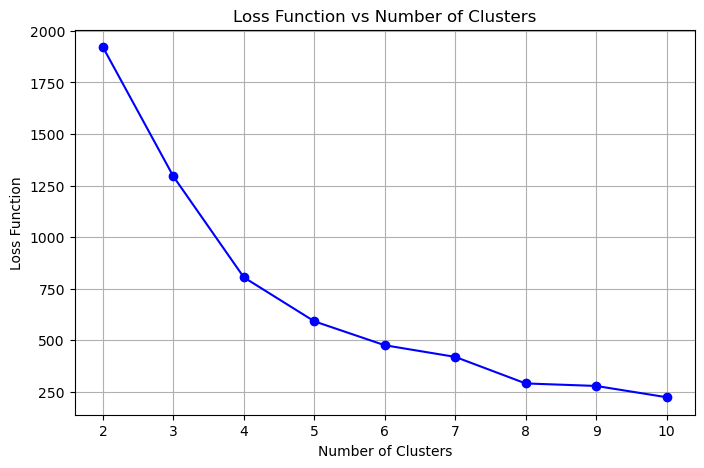

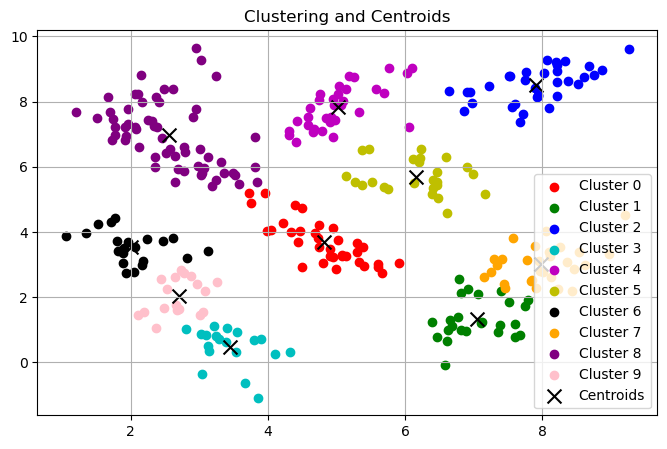

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(loss_values.keys()), list(loss_values.values()), marker='o', color='b')
plt.title("Loss Function vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Loss Function")
plt.grid(True)
plt.show()

def plot_clusters_and_centroids(k, data, clusters, centroids):
    plt.figure(figsize=(8, 5))
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink'] 
    for cluster_index, cluster_points in clusters.items():
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster_index], label=f"Cluster {cluster_index}")
    
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label="Centroids")
    plt.title(f"Clustering and Centroids")
    
    plt.legend()
    plt.grid(True)
    plt.show()

k_to_plot = 5
plot_clusters_and_centroids(k_to_plot, data, clusters, final_centers)